In [1]:
import glob
import pickle
import tqdm
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'mathtext.default':  'regular' })

In [2]:
RESULTS_CACHEFILE=Path("results_acvtool.pickle")


def read_all_results():
    appids = []
    hits = []
    totals = []
    coverages = []
    tools = []
    for tool in ["baseline", "monkey", "droidbot"]:
        with open(f"../{tool}/noncrashing-results.csv", "r") as f:
            for line in f.readlines():
                parts = line.split()
                if len(parts) == 3:
                    appids.append(parts[0])
                    hits.append(int(parts[1]))
                    totals.append(int(parts[2]))
                    coverages.append(float(int(parts[1]))/int(parts[2]))
                    tools.append(tool)
                else:
                    pass # no results / acvtoll crashed
    df = pd.DataFrame({
            'app id': appids,
            'code coverage': coverages,
            'total methods': totals,
            'hit methods': hits,
            'tool': tools,
        })
    return df

def read_from_cache_or_generate(cachepath):
    if not cachepath.exists():
        print("no cache found, loading from raw data")
        results = read_all_results()
        results.to_pickle(cachepath)
    else:
        print("loading from cache!")
        results = pd.read_pickle(cachepath)
        print(f"loaded ifrom cache:\n{results.nunique()}")
    return results

codecov_results = read_from_cache_or_generate(RESULTS_CACHEFILE)

no cache found, loading from raw data


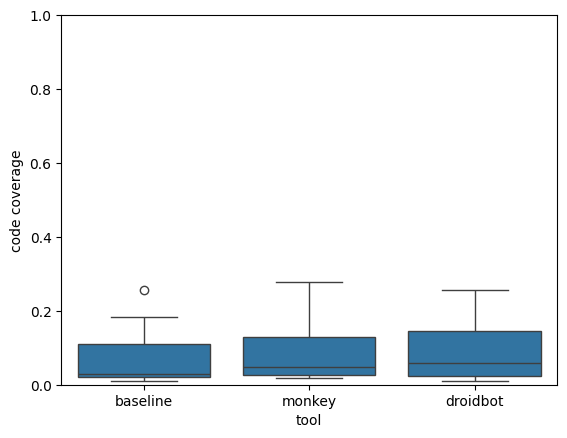

In [3]:
def draw_boxplot():
    ax = sns.boxplot(x='tool', y='code coverage', data=codecov_results)
    ax.set(ylim=(0,1))
    plt.savefig("plots/code-coverage_boxplot.pdf")
    plt.show()

draw_boxplot()

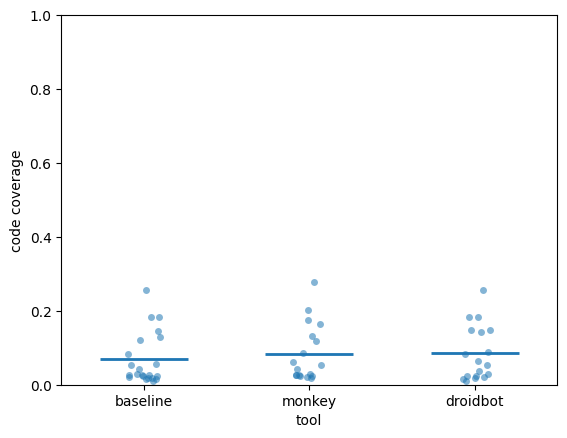

In [4]:
def draw_stripplot():
    # see https://seaborn.pydata.org/examples/jitter_stripplot.html

    #sns.set_theme(style="whitegrid")
    #iris = sns.load_dataset("iris")

    # "Melt" the dataset to "long-form" or "tidy" representation
    #iris = iris.melt(id_vars="species", var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    #sns.despine(bottom=True, left=True)

    # Show each observation with a scatterplot
    sns.stripplot(
        data=codecov_results, x="tool", y="code coverage", 
        #hue="tool",
        dodge=True, alpha=.55, zorder=1, legend=False,
    )
    ax.set(ylim=(0,1))

    # Show the conditional means, aligning each pointplot in the
    # center of the strips by adjusting the width allotted to each
    # category (.8 by default) by the number of hue levels
    sns.pointplot(
        data=codecov_results, x="tool", y="code coverage", 
        #hue="tool",
        #dodge=.3 - .3 / 3,
        #palette="dark", 
        errorbar=None,
        markers="_", markersize=64, linestyle="none",
    )

    # Improve the legend
    #sns.move_legend(
    #    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
    #)
    plt.savefig("plots/code-coverage_stripplot.pdf")
    plt.show()

draw_stripplot()

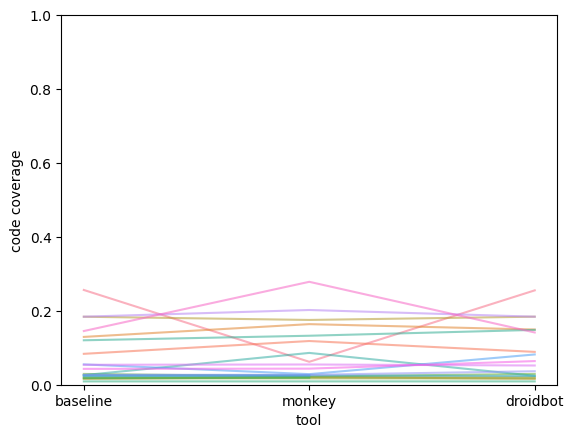

In [5]:
def draw_parallelplot():
    ax = sns.lineplot(data=codecov_results,
                            y="code coverage",
                            x= "tool",
                            hue="app id",
                            dashes=False,
                            markers=True,
                            markersize=8,
                            alpha=0.55,
                            legend=False)
    ax.set(ylim=(0,1))
    plt.savefig("plots/code-coverage_parallelplot.pdf")
    plt.show()

draw_parallelplot()

In [6]:
codecov_results[codecov_results["code coverage"] > 0.25]
# 

,app id,code coverage,total methods,hit methods,tool
0,com.google.android.apps.googleassistant,0.256358,9319,2389,baseline
39,com.socialnmobile.dictapps.notepad.color.note,0.278446,32412,9025,monkey
40,com.google.android.apps.googleassistant,0.255285,9319,2379,droidbot


`com.google.android.apps.googleassistant` crashed on event 1/10M, so that's not ideal

In [7]:
for appid in codecov_results["app id"].unique():
    print(appid)
    print(codecov_results[codecov_results["app id"]==appid]["code coverage"])
    print()

com.google.android.apps.googleassistant
0     0.256358
22    0.062024
40    0.255285
Name: code coverage, dtype: float64

com.sec.app.samsungprintservice
1     0.083587
23    0.118239
41    0.088852
Name: code coverage, dtype: float64

com.samsung.android.app.watchmanager
2     0.129363
24    0.163915
42    0.149368
Name: code coverage, dtype: float64

com.sec.android.easyMover
3     0.015967
25    0.020668
43    0.015967
Name: code coverage, dtype: float64

com.google.android.apps.podcasts
4     0.183969
26    0.175250
44    0.184100
Name: code coverage, dtype: float64

com.skgames.trafficrider
5     0.019826
45    0.020308
Name: code coverage, dtype: float64

com.aim.racing
6     0.017265
46    0.016944
Name: code coverage, dtype: float64

com.igg.android.lordsmobile
7     0.029180
27    0.022289
47    0.029210
Name: code coverage, dtype: float64

com.rubygames.assassin
8     0.017609
28    0.018640
Name: code coverage, dtype: float64

com.sega.sonicdash
9     0.008979
48    0.008992